# 대일감정원 데이터사이언스 스터디 25회
* California Housing Price Prediction
* 2024.02.15

# 0.목표

* 머신러닝 회귀 모델 연습 (BaseLine Model)

# 1.기본 라이브러리 불러오기

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Data Load

* california housing price dataset
* 출처 : kaggle.com > playground > Playground Series - Season 3, Episode 1
* Regression with a Tabular California Housing Dataset
* https://www.kaggle.com/competitions/playground-series-s3e1

* data 다운 받는 곳
* https://www.kaggle.com/competitions/playground-series-s3e1/data

* 다운 받아서 압축을 풀면 세 개의 파일이 나옵니다.
* train.csv, test.csv, sample_submission.csv

* 지난주와 같이 train.csv 파일로 학습시키고 test.csv 파일로 예측을 진행합니다.
* 예측값을 sample_submission.csv 파일 형식으로 저장해서 캐글에 제출하면 됩니다.

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 3. 데이터 분석

In [4]:
train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


In [5]:
#  데이터 설명 

# id : 데이터 고유번호
# MedInc : 특정 지역의 중간 소득 (Median Income)
# HouseAge : 특정 지역의 중간 주택 연도 (Housing Median Age)
# AveRooms : 평균 방 갯수 (Average Rooms)
# AveBedrms : 평균 침실 갯수 (Average Bedrooms)
# Population : 특정 지역의 인구 (Population)
# AveOccup : 평균 자가 비율 (Average Occupancy)
# Latitude : 해당 특정 지역의 위도 (Latitude)
# Longitude : 해당 특정 지역의 경도 (Longitude)

# MedHouseVal : 해당 지역의 주택 가격의 중간값 (Median House Value) -> target

In [6]:
# 8개의 피처를 이용하여, Median House Value를 예측하는 것이 목표입니다.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37137 entries, 0 to 37136
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           37137 non-null  int64  
 1   MedInc       37137 non-null  float64
 2   HouseAge     37137 non-null  float64
 3   AveRooms     37137 non-null  float64
 4   AveBedrms    37137 non-null  float64
 5   Population   37137 non-null  float64
 6   AveOccup     37137 non-null  float64
 7   Latitude     37137 non-null  float64
 8   Longitude    37137 non-null  float64
 9   MedHouseVal  37137 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 2.8 MB


In [8]:
# 37,137개
# 결측치도 없고, 모두 숫자형 데이터입니다.

In [9]:
train.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,37137.00000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000,37137.000000
mean,18568.00000,3.851029,26.057005,5.163124,1.062204,1660.778919,2.831243,35.570030,-119.554329,2.079751
std,10720.67281,1.803167,12.158221,1.206242,0.096490,1302.469608,2.702413,2.083179,1.974028,1.158571
min,0.00000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9284.00000,2.602300,17.000000,4.357522,1.020305,952.000000,2.394495,33.930000,-121.800000,1.208000
50%,18568.00000,3.515600,25.000000,5.068611,1.054545,1383.000000,2.744828,34.190000,-118.450000,1.808000
75%,27852.00000,4.699700,35.000000,5.858597,1.088825,1856.000000,3.125313,37.700000,-118.020000,2.660000
max,37136.00000,15.000100,52.000000,28.837607,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24759 entries, 0 to 24758
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24759 non-null  int64  
 1   MedInc      24759 non-null  float64
 2   HouseAge    24759 non-null  float64
 3   AveRooms    24759 non-null  float64
 4   AveBedrms   24759 non-null  float64
 5   Population  24759 non-null  float64
 6   AveOccup    24759 non-null  float64
 7   Latitude    24759 non-null  float64
 8   Longitude   24759 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.7 MB


In [11]:
# 24,759개
# target인 MedHouseVal이 없습니다.

In [12]:
test.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,49516.000000,3.832618,26.041561,5.168789,1.063599,1679.327548,2.830808,35.598007,-119.570208
std,7147.451994,1.797503,12.177907,1.252874,0.123630,1365.598976,1.615320,2.097787,1.977200
min,37137.000000,0.499900,2.000000,1.000000,0.560000,3.000000,0.764706,32.550000,-124.230000
25%,43326.500000,2.590150,17.000000,4.356443,1.020460,955.000000,2.400000,33.930000,-121.800000
50%,49516.000000,3.504600,25.000000,5.077143,1.054094,1398.000000,2.751592,34.200000,-118.460000
75%,55705.500000,4.687500,35.000000,5.858646,1.088295,1874.000000,3.129167,37.720000,-118.020000
max,61895.000000,15.000100,52.000000,56.269231,10.500000,35682.000000,230.172414,41.950000,-114.550000


In [13]:
print(train.duplicated().sum())
print(test.duplicated().sum())


0
0


In [14]:
# 중복 데이터도 없습니다. (모든 칼럼값이 중복인 데이터가 없다는 뜻입니다.)

# 4. 데이터 전처리

In [15]:
# 결측치 처리
# 라벨 인코딩 
# 불필요함

# 이상치는 여기서는 무시함.

### 1) 데이터 분리

In [16]:
# 타겟과 피처 분리
y = train['MedHouseVal']
X = train.drop(['MedHouseVal'], axis=1)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# train 데이터를 다시 train과 valid로 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((29709, 9), (7428, 9), (29709,), (7428,))

### 2) scaling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [22]:
# 순서가 중요합니다. 
# X_train으로 fit을 하고, 그 scaler로 X_train과 X_valid를 transform 해줍니다.

# 2,3행은 합쳐서 한줄로 많이 씁니다.
# X_train_scaled = scaler.fit_transform(X_train)

# 5. 모델 학습 및 평가

#### 5.0 모델 선택

In [23]:
# 모델선택 
# 우선은 분류가 아니라 회귀모델을 사용해야 합니다.
# 무엇을 사용해도 되나
# 많이 사용하는 랜덤포레스트, XGBoost, LightGBM 3개를 사용해보겠습니다.

#### 5.1 RandomForest 모델

In [24]:
from sklearn.ensemble import RandomForestRegressor  # 모델 불러오기

In [25]:
rf = RandomForestRegressor(n_jobs=-1, random_state=42)   # 모델 객체 생성 (하이퍼파라미터 설정)
rf.fit(X_train_scaled, y_train)                          # 모델 학습 -> 머신러닝의 핵심 코드 부분

RandomForestRegressor(n_jobs=-1, random_state=42)

In [26]:
rf_pred = rf.predict(X_valid_scaled)

In [27]:
# 캐글 문제에서 측정지표를 RMSE로 하고 있으니, 우리도 RMSE(평균 제곱근 오차)로 측정합니다.
from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_valid, rf_pred)
rf_rmse = rf_mse ** 0.5
print(f"RandomForest Model RMSE :{rf_rmse}")

RandomForest Model RMSE :0.6151485650617475


* RMSE는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것입니다.
* 값이 작을수록 오차가 작은 모델이다.

* 회귀모델의 성능 측정 지표
* https://brunch.co.kr/@26dbf56c3e594db/67

#### 5.2 XGBoost 모델

In [28]:
from xgboost import XGBRegressor

In [29]:
xgb = XGBRegressor(n_jobs=-1, random_state=42)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [30]:
xgb_pred = xgb.predict(X_valid_scaled)

In [31]:
xgb_mse = mean_squared_error(y_valid, xgb_pred)
xgb_rmse = xgb_mse ** 0.5
print(f"XGBoost Model RMSE :{xgb_rmse}")

XGBoost Model RMSE :0.6044629509727703


#### 5.3 LightGBM 모델

In [32]:
from lightgbm import LGBMRegressor

In [33]:
lgb = LGBMRegressor(n_jobs=-1, random_state=42)
lgb.fit(X_train_scaled, y_train)

LGBMRegressor(random_state=42)

In [34]:
lgb_pred = lgb.predict(X_valid_scaled)

In [35]:
lgb_mse = mean_squared_error(y_valid, lgb_pred)
lgb_rmse = lgb_mse ** 0.5
print(f"LightGBM Model RMSE :{lgb_rmse}")

LightGBM Model RMSE :0.5960392337114385


#### 5.4 결과 분석 및 결정

In [36]:
print(f"RandomForest Model RMSE :{rf_rmse}")
print(f"XGBoost Model RMSE :{xgb_rmse}")
print(f"LightGBM Model RMSE :{lgb_rmse}")

RandomForest Model RMSE :0.6151485650617475
XGBoost Model RMSE :0.6044629509727703
LightGBM Model RMSE :0.5960392337114385


In [37]:
# RMSE가 대동소이함.
# 우선 가장 RMSE가 낮은 LigthGBM을 사용하겠음.

# 6. Test data 예측

In [38]:
# test 데이터도 train 데이터와 같은 절차로 전처리를 해줍니다.

In [39]:
test_scaled = scaler.transform(test)

In [40]:
lgb_pred_test = lgb.predict(test_scaled)

# 7. 예측 결과 저장 및 제출

In [41]:
# 제출양식 파일 불러오기
submission = pd.read_csv('data/sample_submission.csv')

In [42]:
submission.head()

,id,MedHouseVal
0,37137,2.079751
1,37138,2.079751
2,37139,2.079751
3,37140,2.079751
4,37141,2.079751


In [43]:
# MedHouseVal 칼럼의 값을 우리의 예측값으로 바꿔줍니다.
submission['MedHouseVal'] = lgb_pred_test  

In [44]:
submission.head()

,id,MedHouseVal
0,37137,0.698846
1,37138,1.051022
2,37139,4.249647
3,37140,3.216838
4,37141,2.653135


In [45]:
# 파일로 저장하기
submission.to_csv('submission_0214_lgbm1.csv', index=False)  # csv 파일로 저장합니다.

In [46]:
# 해당 폴더에 submission_0214_lgbm1.csv 파일이 생김

In [47]:
# 캐글에 제출하기

* 출처 : kaggle.com > playground > Playground Series - Season 3, Episode 1
* Regression with a Tabular California Housing Dataset
* https://www.kaggle.com/competitions/playground-series-s3e1

In [48]:
# 우측 상단의 Late Submission을 눌러서 제출합니다.

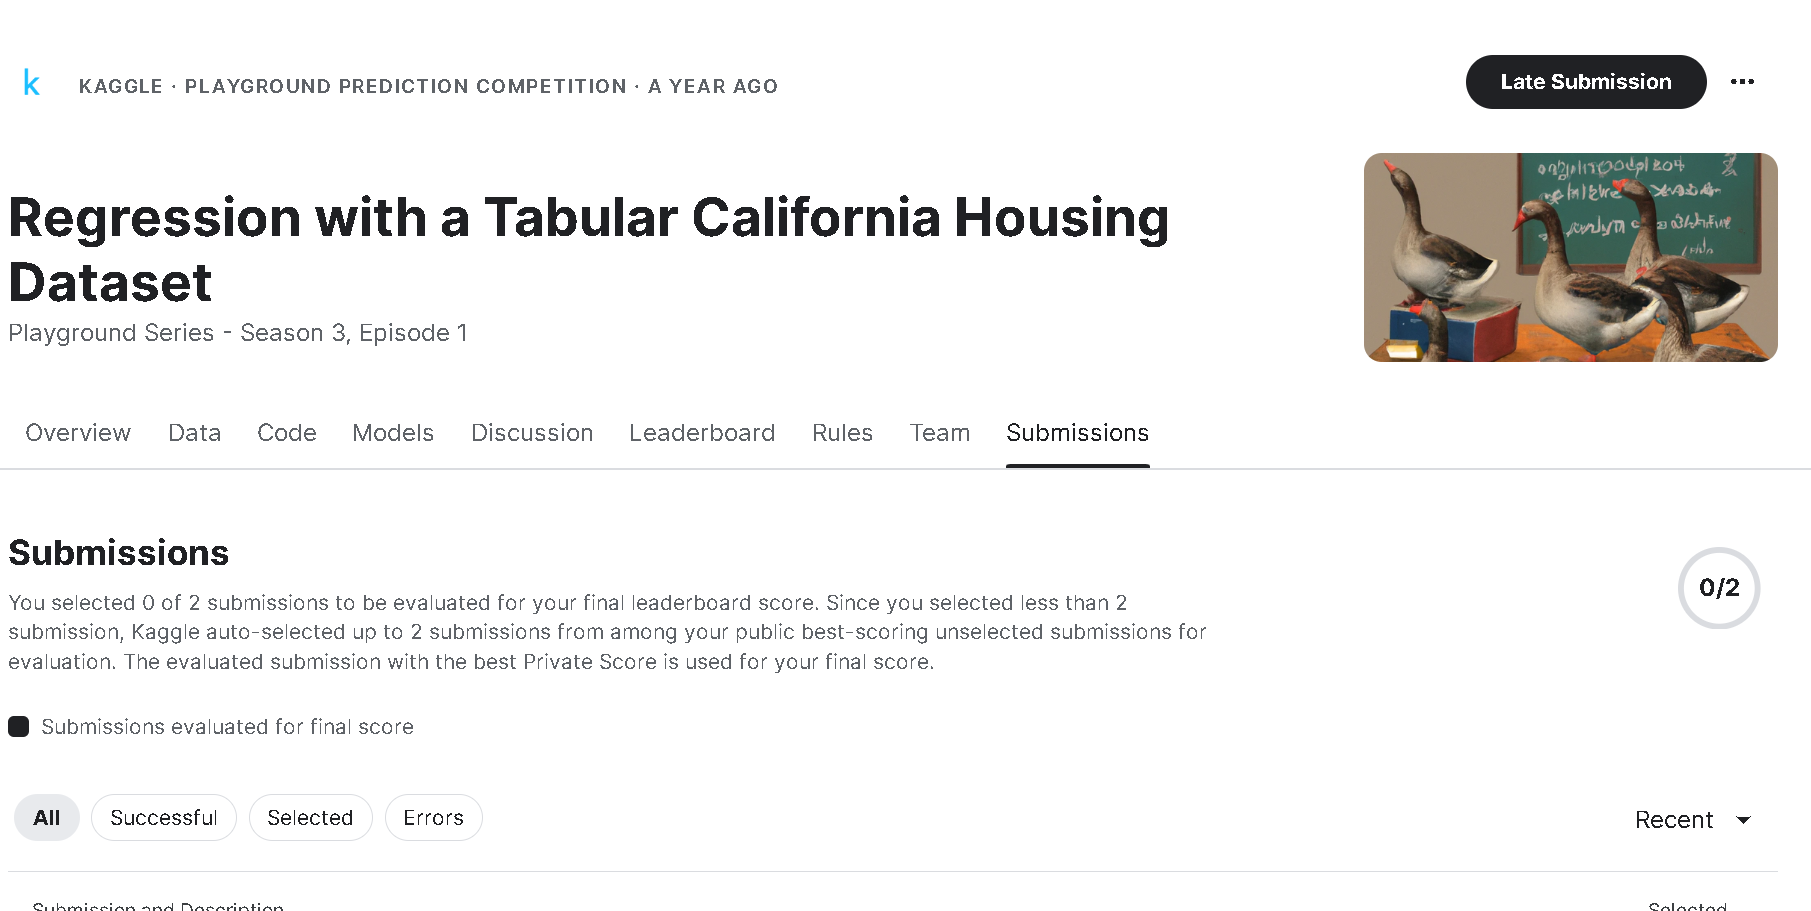

In [49]:
# 아래 화면이 나오면, 파일을 드래그해서 올려주시고, Submit을 누르면 제출 끝

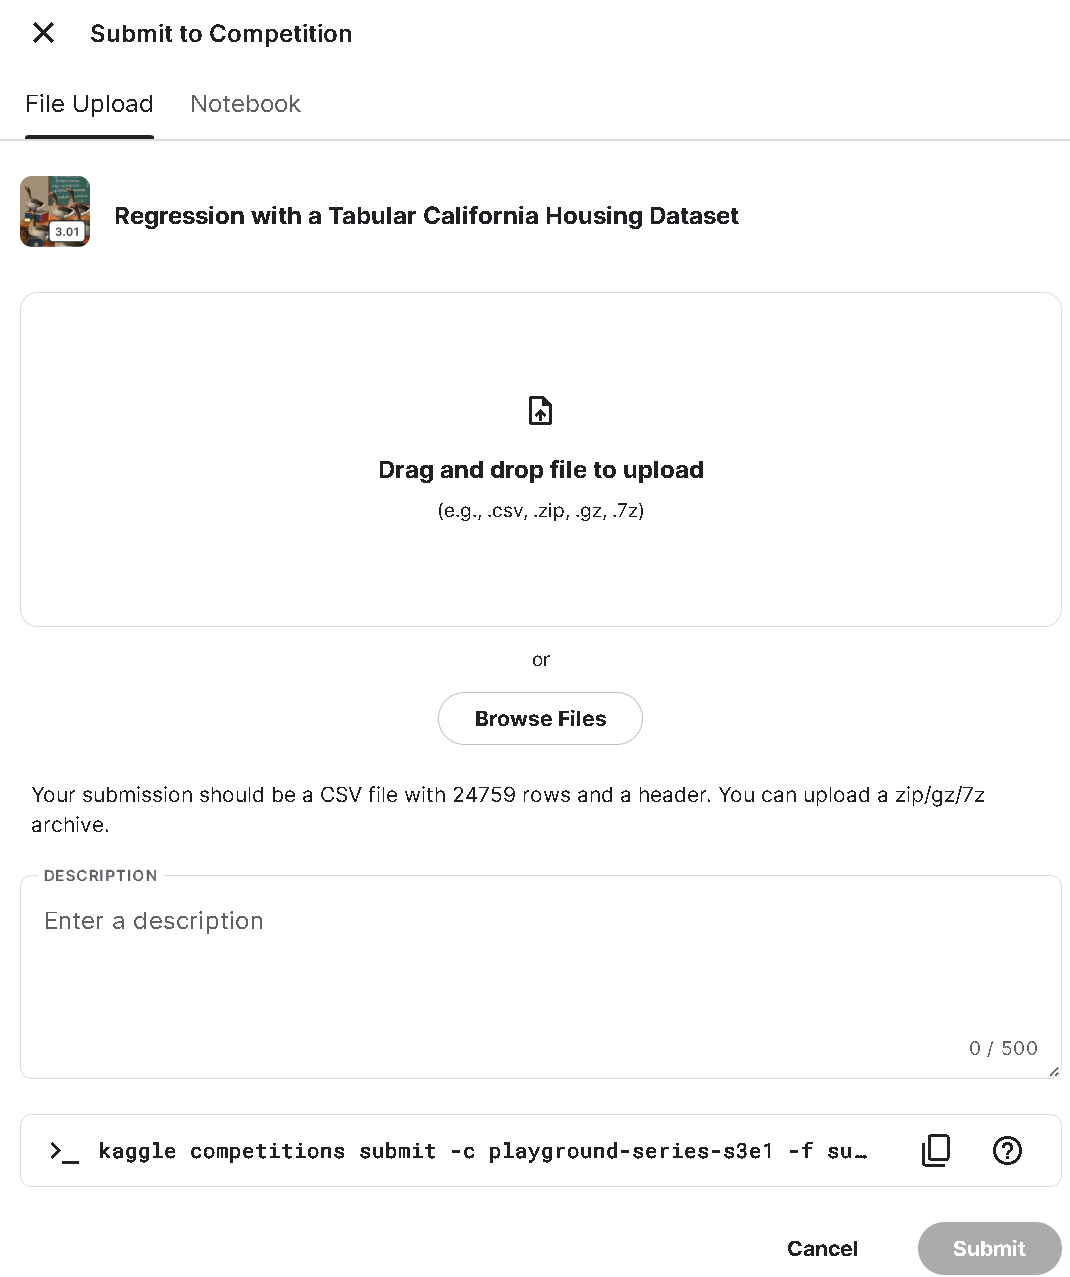

In [50]:
# 점수 확인하기
# leaderboard를 눌러서 나의 점수와 순위를 확인합니다.


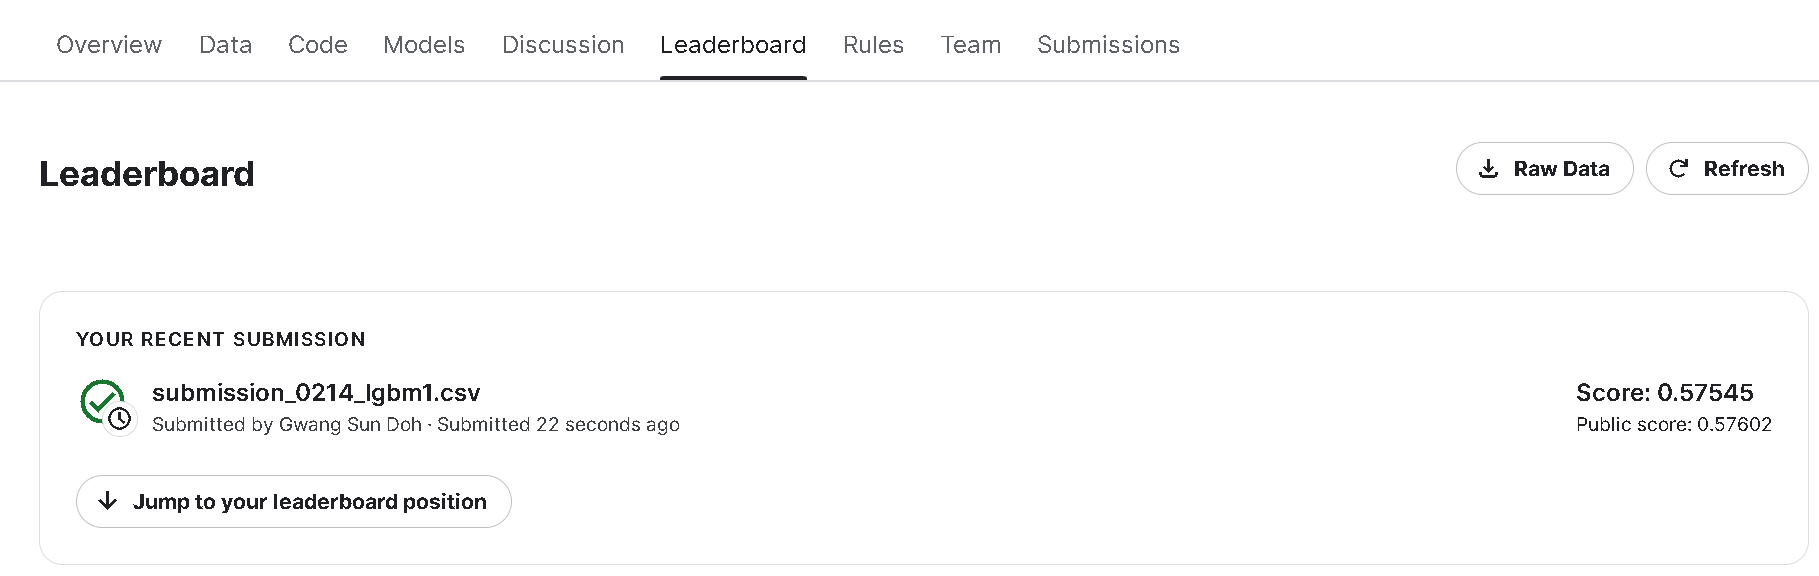

# 8. 전체 코드

In [51]:
# train data RMSE  0.59 ~ 0.60
# test data RMSE  0.57545
# 조금 좋은 결과이지만, 차이가 크지 않으니
# 훈련이 잘 된 편이라고 볼 수 있습니다.

In [53]:
# 대회 참가기간이 끝난 대회라 Leaderboard에 순위가 올라가지는 않습니다.
# 하지만 0.57545면 private 기준 447등에 해당됩니다.
# 참가인원이 689명이니 중하위권에 해당됩니다.
 
# 참고로 캐글은 leaderboard 순위가 public, private로 나뉘어져 있습니다.
# public은 대회 기간 중에만 점수를 보여주고, private은 대회가 끝나고 나서 점수를 보여줍니다.
# 최종 순위는 private 기준으로 나오게 됩니다.

# 9. end to end

* 마르타 벤츠
*https://www.youtube.com/watch?v=vsGrFYD5Nfs

In [52]:
# baseline은 정밀한 모델링보다는 
# 머신러닝에 대해 end to end를 해보는 것이 중요합니다.
# 처음부터 끝까지 작업을 해보면
# 전체 과정(Logic)을 이해할 수 있습니다.

# Base Line을 만들고 난 후에는
# 중간 중간의 공백들을 메워야 합니다.
# 그 공백은 그동안 공부했던 내용들과
# 다른 사람이 작성한 코드들을 참고하여
# 위 기본 모델을 하나씩 개선해 나가면 됩니다.

# 그 과정에서 위 데이터에 대한 더 많은 정보를 얻고
# 데이터분석 및 머신러닝에 대한 실력을 조금씩 늘려갈수 있습니다.

# Kaggle 제출은 하루에도 여러번 할 수 있으니, 일부를 수정하고, 성능이 좋아진 것 같으면
# 다시 제출해서 점수와 순위를 확인하는 일을 반복하면 됩니다.

In [82]:
# Kaggle Competition은 여러 레벨의 문제들이 있습니다.
# 어려운 문제는 우리가 지금 접근하기는 어려우니
# playground에 있는 competition에 하나씩 도전해 보면서
# 실력을 키우면 좋습니다.

# 10. 전체 코드

In [55]:
'''
1.기본 라이브러리 불러오기
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

2.데이터 불러오기
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

3.데이터 분석
train.head()
train.info()
train.describe()

test.head()
test.info()
test.describe()

print(train.duplicated().sum())
print(test.duplicated().sum())

4.데이터 전처리
y = train['MedHouseVal']
X = train.drop(['MedHouseVal'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

5.모델 학습 및 평가

5.1 RandomForest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_valid_scaled)

from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_valid, rf_pred)
rf_rmse = rf_mse ** 0.5
print(f"RandomForest Model RMSE :{rf_rmse}")

5.2 XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor(n_jobs=-1, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_valid_scaled)

xgb_mse = mean_squared_error(y_valid, xgb_pred)
xgb_rmse = xgb_mse ** 0.5
print(f"XGBoost Model RMSE :{xgb_rmse}")

5.3 LightGBM
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(n_jobs=-1, random_state=42)
lgb.fit(X_train_scaled, y_train)
lgb_pred = lgb.predict(X_valid_scaled)

lgb_mse = mean_squared_error(y_valid, lgb_pred)
lgb_rmse = lgb_mse ** 0.5
print(f"LightGBM Model RMSE :{lgb_rmse}")

6. test data 예측 
test_scaled = scaler.transform(test)
lgb_pred_test = lgb.predict(test_scaled)

7. 예측 결과 제출
submission = pd.read_csv('data/sample_submission.csv')
submission['MedHouseVal'] = lgb_pred_test
submission.to_csv('submission_0214_lgbm1.csv', index=False)

'''

'\n1.기본 라이브러리 불러오기\nimport pandas as pd\nimport warnings\nwarnings.filterwarnings("ignore")\n\n2.데이터 불러오기\ntrain = pd.read_csv(\'data/train.csv\')\ntest = pd.read_csv(\'data/test.csv\')\n\n3.데이터 분석\ntrain.head()\ntrain.info()\ntrain.describe()\n\ntest.head()\ntest.info()\ntest.describe()\n\nprint(train.duplicated().sum())\nprint(test.duplicated().sum())\n\n4.데이터 전처리\ny = train[\'MedHouseVal\']\nX = train.drop([\'MedHouseVal\'], axis=1)\n\nfrom sklearn.model_selection import train_test_split\nX_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)\n\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(X_train)\nX_train_scaled = scaler.transform(X_train)\nX_valid_scaled = scaler.transform(X_valid)\n\n5.모델 학습 및 평가\n\n5.1 RandomForest\nfrom sklearn.ensemble import RandomForestRegressor\nrf = RandomForestRegressor(n_jobs=-1, random_state=42)\nrf.fit(X_train_scaled, y_train)\nrf_pred = rf.predict(X_valid_scaled)\n\nfrom 

# 11. 부동산 가격 머신러닝 예제들

* 부동산 가격 분석 data로 유명한 것은 아래와 같은 것들이 있으니 참고하세요.

* Boston house price : https://www.kaggle.com/competitions/home-data-for-ml-course/data
* Paris Hosuing Price : https://www.kaggle.com/competitions/playground-series-s3e6
* Ames Housing dataset :  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques